In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv(r'../data/Ecommerce_Consumer_Behavior_Analysis_Data.csv')

print(df.head())
print(df.info())

   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors        $333.80   ...   
1       High  Huocheng      Food & Beverages        $222.22   ...   
2       High    Huzhen       Office Supplies        $426.22   ...   
3     Middle    Wiwilí       Home Appliances        $101.31   ...   
4     Middle      Nara             Furniture        $211.70   ...   

   Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
0                      7                 NaN                

In [75]:
df["Social_Media_Influence"] = df["Social_Media_Influence"].fillna("Unknown")
df["Engagement_with_Ads"] = df["Engagement_with_Ads"].fillna("Unknown")

In [76]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purchase                     

In [77]:
#the average age of customers for each income level
avg_age_by_income = df.groupby("Income_Level")["Age"].mean()
print(avg_age_by_income)
avg_age_by_income = df.groupby("Income_Level")["Age"].mean()
print(avg_age_by_income)

Income_Level
High      34.231068
Middle    34.381443
Name: Age, dtype: float64
Income_Level
High      34.231068
Middle    34.381443
Name: Age, dtype: float64


In [78]:
#the number of customers for each gender
gender_dist = df["Gender"].value_counts()
print(gender_dist)

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64


In [79]:
#purchase amounts by removing '$' and converting to float
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)
#the average purchase amount for each category
avg_amount_by_category = df.groupby("Purchase_Category")["Purchase_Amount"].mean()
print(avg_amount_by_category.head())

Purchase_Category
Animal Feed               260.615909
Arts & Crafts             221.468235
Baby Products             272.500488
Beauty & Personal Care    233.676765
Books                     300.613243
Name: Purchase_Amount, dtype: float64


In [80]:
#customers in each marital status category
marital_dist = df["Marital_Status"].value_counts()
print(marital_dist)

Marital_Status
Widowed     260
Married     253
Divorced    245
Single      242
Name: count, dtype: int64


In [81]:
#average satisfaction scores per channel
satisfaction_by_channel = df.groupby("Purchase_Channel")["Customer_Satisfaction"].mean()
print(satisfaction_by_channel)

Purchase_Channel
In-Store    5.239264
Mixed       5.379412
Online      5.574850
Name: Customer_Satisfaction, dtype: float64


In [82]:
#total purchase amounts by device used
total_by_device = df.groupby("Device_Used_for_Shopping")["Purchase_Amount"].sum()
print(total_by_device)

Device_Used_for_Shopping
Desktop       93344.49
Smartphone    87717.59
Tablet        94001.80
Name: Purchase_Amount, dtype: float64


In [83]:
#the top 5 purchase categories with the highest total spending
top_categories = df.groupby("Purchase_Category")["Purchase_Amount"].sum().nlargest(5)
print(top_categories)

Purchase_Category
Jewelry & Accessories    15139.36
Sports & Outdoors        14610.51
Electronics              13842.41
Software & Apps          13601.41
Toys & Games             13536.46
Name: Purchase_Amount, dtype: float64


In [84]:
#Compare average purchase amount between loyalty members vs non-members
loyalty_by_amount = df.groupby("Customer_Loyalty_Program_Member")["Purchase_Amount"].mean()
print(loyalty_by_amount)

Customer_Loyalty_Program_Member
False    288.373026
True     261.266823
Name: Purchase_Amount, dtype: float64


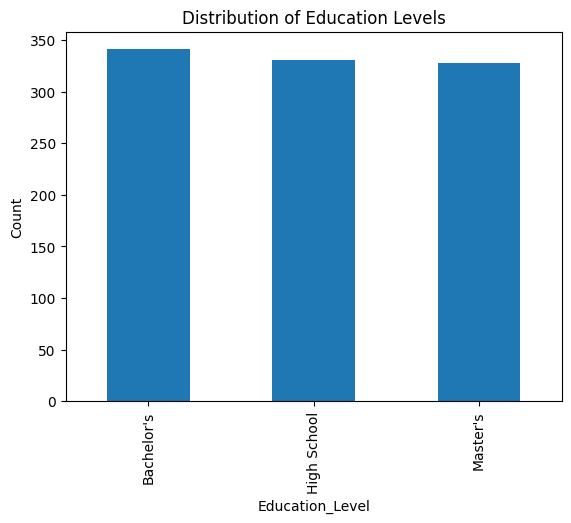

In [85]:
df["Education_Level"].value_counts().plot(kind="bar")
plt.title("Distribution of Education Levels")
plt.ylabel("Count")
plt.show()

In [86]:
#average research time per age
research_by_age = df.groupby("Age")["Time_Spent_on_Product_Research(hours)"].mean()
print(research_by_age.head())

Age
18    1.230000
19    0.921875
20    0.710526
21    1.109429
22    0.973684
Name: Time_Spent_on_Product_Research(hours), dtype: float64


In [87]:
#percentage of discount usage by gender
discount_by_gender = df.groupby("Gender")["Discount_Used"].value_counts(normalize=True) * 100
print(discount_by_gender.head())

Gender    Discount_Used
Agender   True             68.421053
          False            31.578947
Bigender  False            55.000000
          True             45.000000
Female    True             53.097345
Name: proportion, dtype: float64


In [88]:
#the average satisfaction scores for each income level
satisfaction_by_income = df.groupby("Income_Level")["Customer_Satisfaction"].mean()
print(satisfaction_by_income)

Income_Level
High      5.207767
Middle    5.602062
Name: Customer_Satisfaction, dtype: float64


In [89]:
#average time taken to make purchase decisions per category
decision_by_category = df.groupby("Purchase_Category")["Time_to_Decision"].mean()
print(decision_by_category.head())

Purchase_Category
Animal Feed               7.818182
Arts & Crafts             8.058824
Baby Products             7.536585
Beauty & Personal Care    8.382353
Books                     8.189189
Name: Time_to_Decision, dtype: float64


In [90]:
# Group customers into age bins and count how many fall into each
age_bins = pd.cut(df["Age"], bins=[0, 30, 50, 70, 100])
age_dist = df.groupby(age_bins, observed=False)["Customer_ID"].count()
print(age_dist)

Age
(0, 30]      387
(30, 50]     613
(50, 70]       0
(70, 100]      0
Name: Customer_ID, dtype: int64


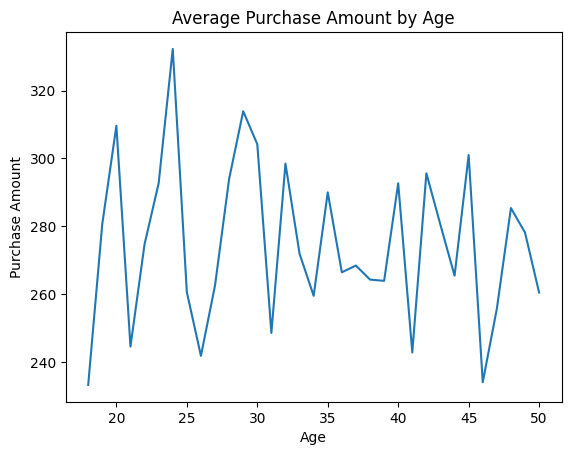

In [91]:
df.groupby("Age")["Purchase_Amount"].mean().plot(kind="line")
plt.title("Average Purchase Amount by Age")
plt.ylabel("Purchase Amount")
plt.show()

In [92]:
#Compare average purchase amount based on ad engagement
ads_by_amount = df.groupby("Engagement_with_Ads")["Purchase_Amount"].mean()
print(ads_by_amount)

Engagement_with_Ads
High       277.658222
Low        268.259522
Medium     281.211107
Unknown    272.581875
Name: Purchase_Amount, dtype: float64


In [93]:
total_by_payment = df.groupby("Payment_Method")["Purchase_Amount"].sum()
print(total_by_payment)

Payment_Method
Cash           50072.47
Credit Card    52677.54
Debit Card     53552.04
Other          57797.50
PayPal         60964.33
Name: Purchase_Amount, dtype: float64


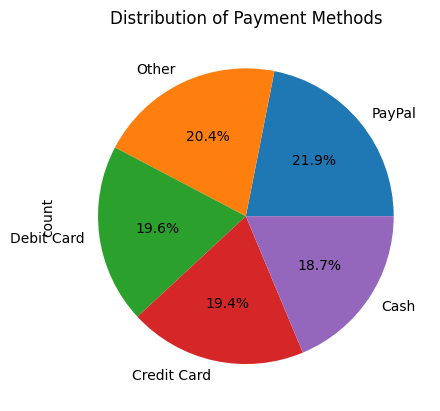

In [94]:
df["Payment_Method"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Payment Methods")
plt.show()

In [95]:
#how purchase intent varies by gender
intent_by_gender = df.groupby("Gender")["Purchase_Intent"].value_counts()
print(intent_by_gender.head())

Gender    Purchase_Intent
Agender   Need-based         6
          Planned            5
          Wants-based        5
          Impulsive          3
Bigender  Need-based         7
Name: count, dtype: int64


In [96]:
#how social media influence affects purchase intent
influence_by_intent = df.groupby("Social_Media_Influence")["Purchase_Intent"].value_counts()
print(influence_by_intent.head())

Social_Media_Influence  Purchase_Intent
High                    Impulsive          73
                        Wants-based        73
                        Need-based         66
                        Planned            56
Low                     Planned            72
Name: count, dtype: int64


In [97]:
#the number of customers per purchase channel
channel_dist = df["Purchase_Channel"].value_counts()
print(channel_dist)

Purchase_Channel
Mixed       340
Online      334
In-Store    326
Name: count, dtype: int64


In [98]:
#how satisfaction varies depending on purchase intent
satisfaction_by_intent = df.groupby("Purchase_Intent")["Customer_Satisfaction"].mean()
print(satisfaction_by_intent)

Purchase_Intent
Impulsive      5.395161
Need-based     5.375000
Planned        5.230769
Wants-based    5.594378
Name: Customer_Satisfaction, dtype: float64


In [99]:
#average purchase amount with and without discount use
discount_by_amount = df.groupby("Discount_Used")["Purchase_Amount"].mean()
print(discount_by_amount)

Discount_Used
False    276.229436
True     273.992284
Name: Purchase_Amount, dtype: float64


In [100]:
#total spending by customers in each occupation
total_by_occupation = df.groupby("Occupation")["Purchase_Amount"].sum()
print(total_by_occupation)

Occupation
High      140776.67
Middle    134287.21
Name: Purchase_Amount, dtype: float64


In [101]:
#the top 10 customers with the highest total purchase spending
top_customers = df.groupby("Customer_ID")["Purchase_Amount"].sum().nlargest(10)
print(top_customers)

Customer_ID
60-470-3563    498.33
13-848-5757    498.23
15-663-7994    497.80
86-257-9581    497.76
15-421-1255    497.75
72-830-1211    496.11
85-467-6564    495.95
72-590-6161    495.80
69-394-1424    494.97
59-261-4453    494.81
Name: Purchase_Amount, dtype: float64


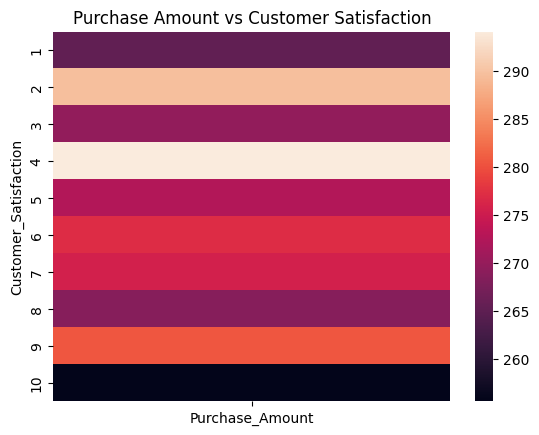

In [102]:

pivot = df.pivot_table(values="Purchase_Amount", index="Customer_Satisfaction", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Purchase Amount vs Customer Satisfaction")
plt.show()

In [103]:
#Identify the 10 locations with the highest total purchase amount
top_locations = df.groupby("Location")["Purchase_Amount"].sum().nlargest(10)
print(top_locations)

Location
Göteborg           1161.29
Oslo               1021.55
Punta Gorda         820.45
Magdalena           804.74
Hoolt               780.60
Veiga               779.89
San Carlos          722.39
Týn nad Vltavou     682.59
Cimara              673.61
Seleuš              672.99
Name: Purchase_Amount, dtype: float64


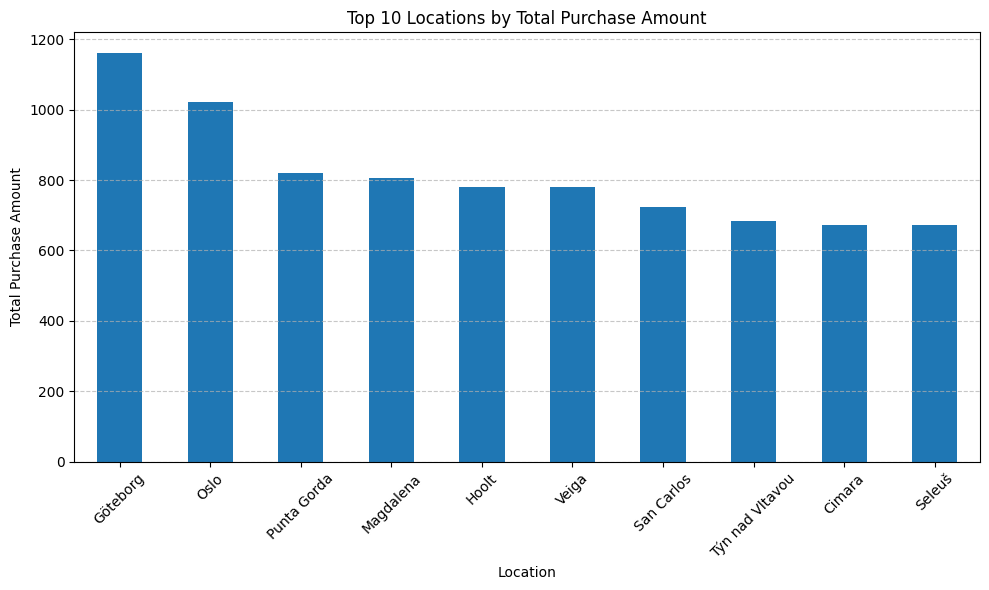

In [104]:
plt.figure(figsize=(10, 6))
top_locations.plot(kind="bar")
plt.title("Top 10 Locations by Total Purchase Amount")
plt.xlabel("Location")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()